In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess


In [15]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [16]:
sns.set(rc={"figure.dpi": 100, 'savefig.dpi': 300})
sns.set_theme(style="white")
sns.set_style('ticks')
plt.rcParams['font.size'] = 12
plt.rc('axes', titlesize=12)


In [17]:
filepath = "../Sr_Nd_data.xlsx"
save_path = '../plots/'
# Import data as dataframes
Nd_data = pd.read_excel(filepath, sheet_name='Nd')
Sr_data = pd.read_excel(filepath, sheet_name='Sr')
d13C_data = pd.read_excel(filepath, sheet_name='d13C')
Hg_data = pd.read_excel(filepath, sheet_name='Hg')

#sort dataframes by Age column
Nd_data.sort_values('Age')
Sr_data.sort_values('Age')
d13C_data.sort_values('Age')
Hg_data.sort_values('Age')
Nd_summary = Nd_data.groupby('Locality').describe()
Nd_summary.to_excel(f'{save_path}Nd-summary.xlsx')

In [18]:
d13C = d13C_data["d13C"]
d13C_age = d13C_data["Age"]

Hg = Hg_data["Hg"]
Hg_age = Hg_data["Age"]

Sr = Sr_data["Sr_iso"]
Sr_age = Sr_data["Age"]
Sr_err = Sr_data["2sd"]

Ndt = Nd_data["eNd(t)"]
Ndt_age = Nd_data["Age"]
Ndt_err = Nd_data["eNd(t)_2sd"]


In [19]:
colors = ["#848482","black",  "#f7accf", "#1ECBE1"]  # C, Hg, Sr, Nd
markers = ['^', "o"]  # WMJ, JA
f_size = 12
s_factor = .25
label_d13C = r'$\delta^{13}C_{carb}\;(‰\;VPDB)$'
label_d13Corg = r'$\delta^{13}C_{org}\;(‰\;VPDB)$'
label_Sr = r"$^{87}Sr/^{86}Sr$"
label_Nd = "$\epsilon_{Nd(t)}$"
label_Hg = "Hg (ppb)"
label_HgTOC = "Hg/TOC (ppb/wt.%)"

In [20]:
smoothed_d13C = lowess(d13C, d13C_age, frac=s_factor)
smoothed_Sr = lowess(Sr, Sr_age, frac=s_factor)
smoothed_Hg = lowess(Hg, Hg_age, frac=s_factor)
smoothed_Nd = lowess(Ndt, Ndt_age, frac=.3)

x_axis = [d13C_age, Hg_age, Sr_age, Ndt_age]
y_axis = [d13C, Hg, Sr, Ndt]
df = [d13C_data, Hg_data, Sr_data, Nd_data]
y_err = [None, None, Sr_err, Ndt_err]
labels = [label_d13C, label_Hg, label_Sr, label_Nd]
smoothed = [smoothed_d13C, smoothed_Hg, smoothed_Sr, smoothed_Nd]


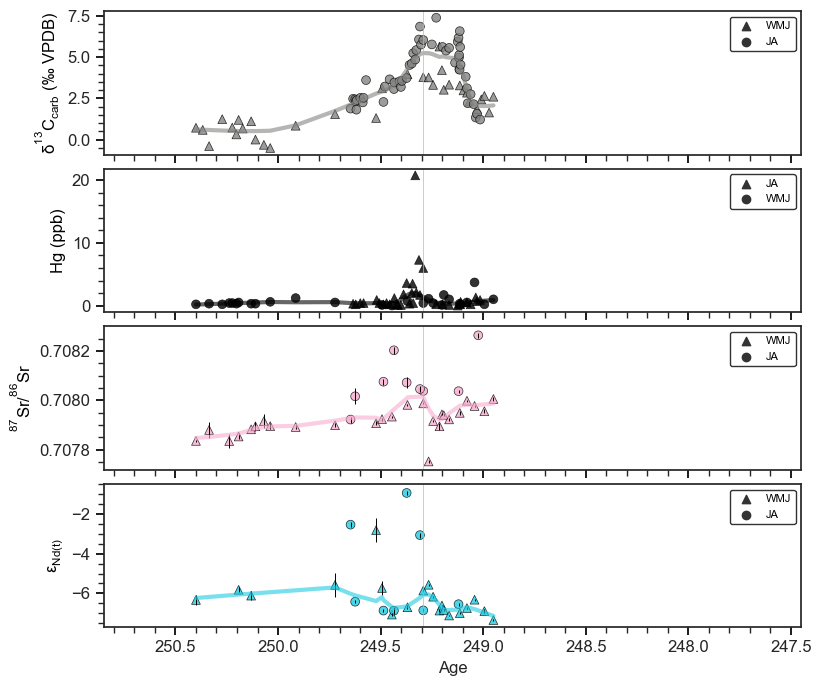

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(9, 8), sharex=True)
(ax0, ax1, ax2, ax3) = ax
fig.subplots_adjust(hspace=0.1, wspace=0.25)

axes = [ax0, ax1, ax2, ax3]

ax = plt.gca()

for i in range(2, 4, 1):
    axes[i].errorbar(x=x_axis[i], y=y_axis[i], xerr=None, yerr=y_err[i],
                     alpha=1, ecolor='black', markersize=20,
                     linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
for i in range(len(axes)):
    axes[i].plot(smoothed[i][:, 0], smoothed[i][:, 1],
                 c=colors[i], linewidth=3, alpha=.6)
for i in range(4):
    sns.scatterplot(x=x_axis[i], y=y_axis[i], ax=axes[i], data=df[i], edgecolor="black",
                    alpha=.8, legend=True, style='Locality', markers=markers, s=40, color=colors[i]
                    )
    axes[i].invert_xaxis()
    axes[i].tick_params(labelsize=f_size, color="black",)
    axes[i].set_xlim(250.85, 247.45)
    axes[i].set_ylabel(labels[i], fontsize=f_size, c="black")
    axes[i].legend(loc='upper right', ncols=1, fontsize=8, labelcolor='black',
                   markerscale=1, edgecolor='black')
    axes[i].minorticks_on()
    axes[i].axvline(x=249.292, linewidth=.5, color="#b8b8b8", linestyle='-')

# plt.savefig(f'{save_path}Nd_Sr.pdf')
# plt.savefig(f'{save_path}manuscript_figures/Nd_Sr.png')


# Vertical plot by age


meta NOT subset; don't know how to subset; dropped


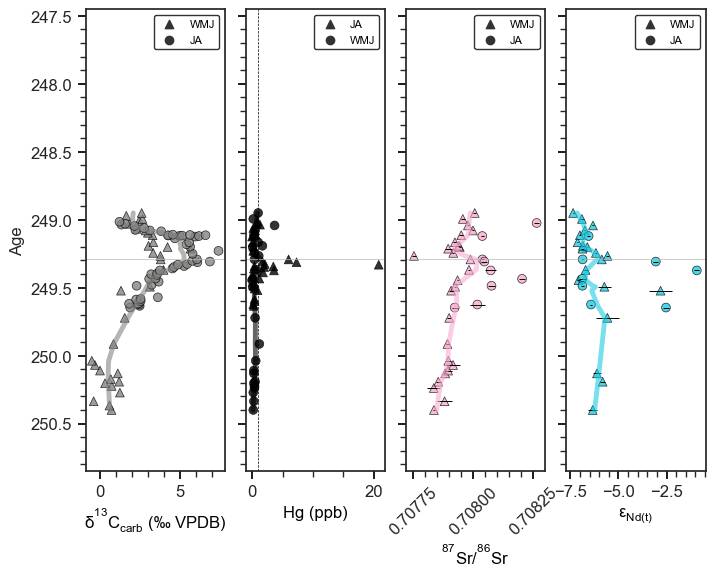

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 6), sharey=True)
(ax0, ax1, ax2, ax3) = ax
fig.subplots_adjust(hspace=0.1, wspace=0.15)

axes = [ax0, ax1, ax2, ax3]

ax = plt.gca()

for i in range(2, 4, 1):
    axes[i].errorbar(x=y_axis[i], y=x_axis[i], yerr=None, xerr=y_err[i],
                     alpha=1, ecolor='black', markersize=20,
                     linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
for i in range(len(axes)):
    axes[i].plot(smoothed[i][:, 1], smoothed[i][:, 0],
                 c=colors[i], linewidth=3.5, alpha=.6)
for i in range(4):
    sns.scatterplot(x=y_axis[i], y=x_axis[i], ax=axes[i], data=df[i], edgecolor="black",
                    alpha=.8, legend=True, style='Locality', markers=markers, s=40, color=colors[i]
                    )
    axes[i].invert_yaxis()
    axes[i].tick_params(labelsize=f_size, color="black",)
    axes[i].set_ylim(250.85, 247.45)
    axes[i].set_xlabel(labels[i], fontsize=f_size, c="black")
    axes[i].legend(loc='upper right', ncols=1, fontsize=8, labelcolor='black',
                   markerscale=1, edgecolor='black')
    axes[i].minorticks_on()
    axes[i].axhline(y=249.292, linewidth=.5, color="#b8b8b8", linestyle='-')

ax1.axvline(x=1, linewidth=.5, color="black", linestyle='--')
# change orientation of the x-axis labels on the Sr isotope plot
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.savefig(f'{save_path}Oman-data-aged.pdf')

# CHINA DATA

In [23]:
filepath = "../China_data_aged.xlsx"
# Import data as dataframes
d13C_data = pd.read_excel(filepath, sheet_name='d13C')
Corg_data = pd.read_excel(filepath, sheet_name='d13Corg')
Hg_data = pd.read_excel(filepath, sheet_name='Hg')
HgTOC_data = pd.read_excel(filepath, sheet_name='Hg-TOC')

#sort dataframes by Age column
d13C_data.sort_values('Age')
Corg_data.sort_values('Age')
Hg_data.sort_values('Age')
HgTOC_data.sort_values('Age')

,Age,Hg_TOC,Material,Locality
25,249.107000,26.008338,Limestone,QIA
17,249.129000,2.381766,Limestone,SHA
24,249.310000,83.881579,Limestone,QIA
23,249.337000,40.229885,Limestone,QIA
16,249.352000,88.461830,Limestone,SHA
22,249.365000,42.401669,Limestone,QIA
15,249.370000,69.091023,dark mudstone,SHA
21,249.383000,52.400000,Limestone,QIA
14,249.388000,63.951507,dark mudstone,SHA
13,249.396000,66.852690,Limestone,SHA


In [24]:
d13C = d13C_data["d13C"]
d13C_age = d13C_data["Age"]

Corg = Corg_data["d13C"]
Corg_age = Corg_data["Age"]

Hg = Hg_data["Hg"]
Hg_age = Hg_data["Age"]

HgTOC = HgTOC_data["Hg_TOC"]
HgTOC_age = HgTOC_data["Age"]


In [25]:
smoothed_d13C = lowess(d13C, d13C_age, frac=s_factor)
smoothed_Corg = lowess(Corg, Corg_age, frac=s_factor)
smoothed_Hg = lowess(Hg, Hg_age, frac=s_factor)
smoothed_HgTOC = lowess(HgTOC, HgTOC_age, frac=s_factor)

y_axis = [d13C_age, Corg_age, Hg_age, HgTOC_age]
x_axis = [d13C, Corg, Hg, HgTOC]
df = [d13C_data, Corg_data, Hg_data, HgTOC_data]
labels = [label_d13C, label_d13Corg, label_Hg, label_HgTOC]

smoothed = [smoothed_d13C, smoothed_Corg, smoothed_Hg, smoothed_HgTOC]
color1 = ['black', "#838383"]
color2 = ['black', "#838383", "#c95428"]
colors = [color1, color1, color2, color1]

meta NOT subset; don't know how to subset; dropped


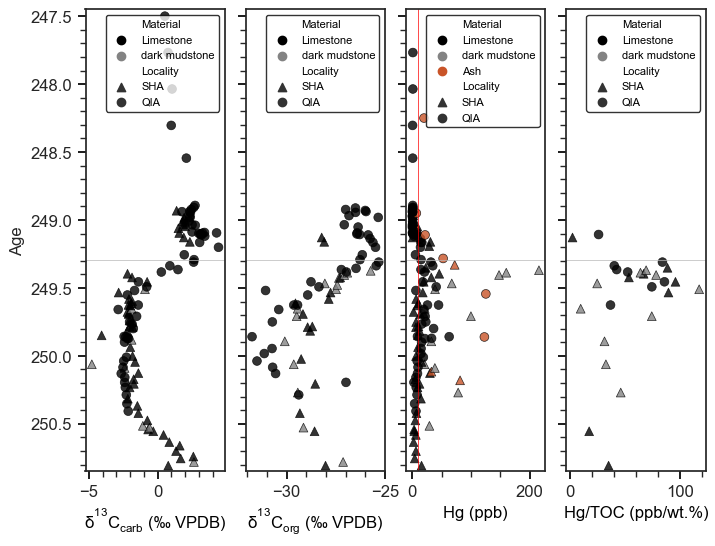

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 6), sharey=True)
(ax0, ax1, ax2, ax3) = ax
fig.subplots_adjust(hspace=0.1, wspace=0.15)

axes = [ax0, ax1, ax2, ax3]
ax = plt.gca()

for i in range(4):
    sns.scatterplot(x=x_axis[i], y=y_axis[i], ax=axes[i], data=df[i], edgecolor="black", hue = 'Material', palette = colors[i],
                    alpha=.8, legend=True, style='Locality', markers=markers, s=40, color='black'
                    )
    axes[i].invert_yaxis()
    axes[i].tick_params(labelsize=f_size, color="black",)
    axes[i].set_ylim(250.85, 247.45)
    axes[i].set_xlabel(labels[i], fontsize=f_size, c="black")
    axes[i].legend(loc='upper right', ncols=1, fontsize=8, labelcolor='black',
                   markerscale=1, edgecolor='black')
    axes[i].minorticks_on()
    axes[i].axhline(y=249.292, linewidth=.5, color="#b8b8b8", linestyle='-')
ax2.axvline(x = 10, linewidth=.5, color='red', linestyle='-')
plt.savefig(f'{save_path}China-data-aged.pdf')
